# RMS Titanic
RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during its maiden voyage from Southampton to New York City.
There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. 
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
We shall now do in-depth analysis for passengers on Titanic and try to answer these few questions - 

First some basic questions:
1. Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?

Then we'll dig deeper, with a broader question:
5. What factors helped someone survive the sinking?

In [1]:
#Importing necessary modules
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1 - Understanding passenger trends

In [2]:
#Obtaining passenger's data
titanic_data = pd.read_csv("train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In the above data set we find 891 passenger's details like their age, gender, class, point of embarkment, etc.
We also findd some columns have null data, so we have to proceed accordingly

In [3]:
#Finding ratio of male to female

Text(0.5,1,'Male vs Female count')

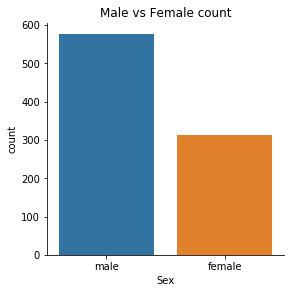

In [32]:
sns.factorplot("Sex",data=titanic_data,kind = "count")
plt.title("Male vs Female count")

So we can see that number of females abord Titanic was little more than half the number of males.
But what about the children. Let us assume people abord less than age of 16 be considered as children

In [6]:
#Segregating males, females and children

def male_female_child(passenger):
    age,sex = passenger
    if age < 16:
        return "child"
    else:
        return sex
    
titanic_data["Person"] = titanic_data[["Age","Sex"]].apply(male_female_child,axis=1)
titanic_data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Text(0.5,1,'Males vs Females vs Children count')

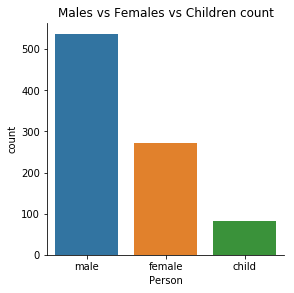

In [33]:
#Male, Female and child ratio
sns.factorplot("Person",data=titanic_data,kind="count")
plt.title("Males vs Females vs Children count")

Above graph shows number of children was considerably less than number of adults on Titanic.

In [80]:
titanic_data["Person"].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

Text(0.5,1,'Frequency distribution of Age')

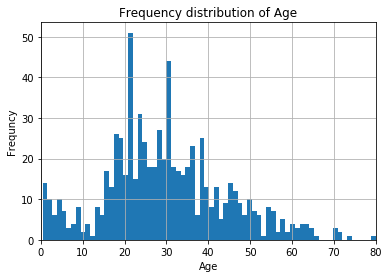

In [36]:
fig = titanic_data["Age"].hist(bins=70,xlabelsize=10)
fig.set_xlabel("Age")
fig.set_xlim([0,titanic_data.Age.max()])
fig.set_ylabel("Frequncy")
plt.title("Frequency distribution of Age")

The above graph indicates that maximum frequency of people is in the age range of 20 to 40 years, with mean age between 20-30

In [23]:
#The actual mean age
titanic_data.Age.mean()

29.69911764705882

Text(0.5,1,'Number of Passengers per class')

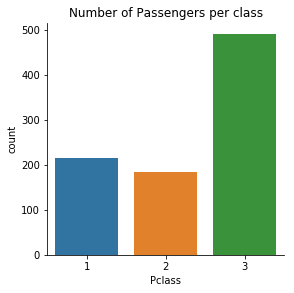

In [30]:
sns.factorplot("Pclass",data=titanic_data,kind="count")
plt.title("Number of Passengers per class")

Majority of passengers were in 3rd class.

Text(0.5,1,'Male vs Female in each class')

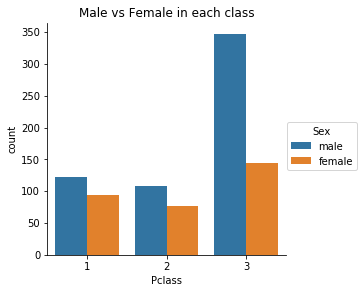

In [38]:
sns.factorplot("Pclass",data=titanic_data,kind="count",hue="Sex")
plt.title("Male vs Female in each class")

From above graph it is clear that majority of passengers in 3rd class were male. They are more than double the number of females.

Text(0.5,1,'Number of different types of persons per class')

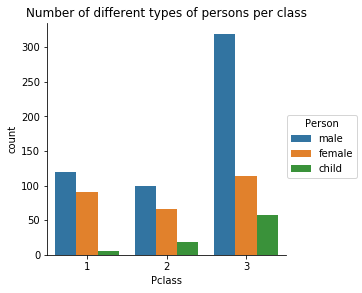

In [37]:
sns.factorplot("Pclass",data=titanic_data,kind="count",hue="Person")
plt.title("Number of different types of persons per class")

The above graph indicates that majority children were in 3rd class while other two classes were populated by adults.

Now we will shift our analysis towards trends and frequency distribution using kde plots.

Text(0.5,1,'Male vs Female kde plot')

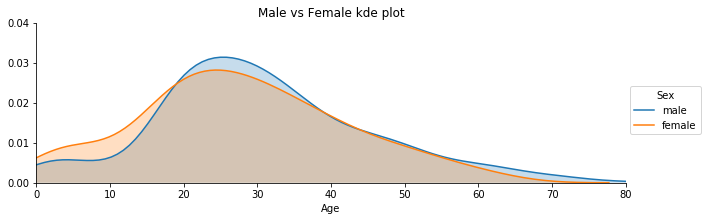

In [45]:
fig1 = sns.FacetGrid(titanic_data,hue="Sex",aspect=3)
fig1.map(sns.kdeplot,"Age",shade=True)
fig1.set(xlim=(0,titanic_data.Age.max()),ylim=(0.00,0.04))
fig1.add_legend()
plt.title("Male vs Female kde plot")

The kde plot for both male and female is almost similar with a slight dip in number of males below 20 years. Thus we can conclude among children majority are male.

Text(0.5,1,'Male vs Female vs Child kde plot')

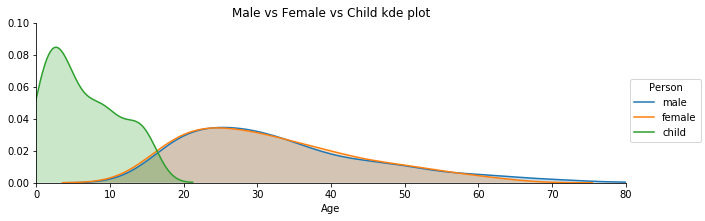

In [48]:
fig2 = sns.FacetGrid(titanic_data,hue="Person",aspect=3)
fig2.map(sns.kdeplot,"Age",shade = True)
fig2.set(xlim=(0,titanic_data.Age.max()),ylim=(0.00,0.10))
fig2.add_legend()
plt.title("Male vs Female vs Child kde plot")

Above graph clears out that distribution of male and female is almost uniform with mean age around 29 while for children mean age is around 6.
Calculating mean age of passengers below age 16 turns out to be 6.36 years.

In [54]:
titanic_data.Age[titanic_data.Age<16].mean()

6.369518072289157

Text(0.5,1,'Frequency distribution of age per class')

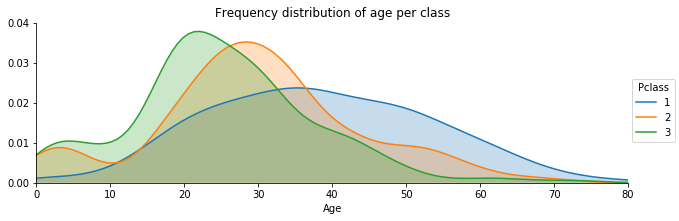

In [58]:
fig3 = sns.FacetGrid(titanic_data,hue="Pclass",aspect=3)
fig3.map(sns.kdeplot,"Age",shade=True)
fig3.set(xlim=(0,titanic_data.Age.max()),ylim=(0.00,0.04))
fig3.add_legend()
plt.title("Frequency distribution of age per class")

Above graph reveals that there was uniform trend of age for 1st class while for 2nd and 3rd class it was jaggered in begining indicating younger passengers in 2nd and 3rd Class.

### Conclusions from Part 1 - 
1. Number of male passengers was almost the double of female passengers.
2. Number of children (people < 16 years) was considerably less than adults.
3. Majority of people were in the age group of 20 to 40 years.
4. The average age was approximately 30 years.
5. Number of passengers in 3rd class was much higher than 1st and 2nd Class.
6. While number of males and females in 1st and 2nd class was almost comparable, number of males in 3rd class was much higher.
7. The number of children gradually increased from 1st class to 3rd class.
8. The overall distribution of males vs females across different age group was almost similar.
9. The mean age of children was 6 years.
10. For 1st class age distribution was uniform with average age being around 38, while for 2nd class it was around 30, while it was around 25 for 3rd class.

## Part 2 - Relation between Deck & Number of passengers

In [92]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In the dataset, cabin details can be found from Cabin column. But their are many null values. So we will drop them.

In [117]:
#Dropping null values and storing not null Cabin values to series - deck
deck = titanic_data.Cabin.dropna()

In [118]:
#Taking out first letter of Cabin value and stroing it in a series
cabin_levels = []
for values in deck:
    cabin_levels.append(values[0])

In [119]:
#Converting series to dataframe
cabin_dframe = DataFrame(cabin_levels)
cabin_dframe.columns = ["Cabin"]

In [120]:
#Extracting passenger class from dataset where cabin value is present
cabin_class = titanic_data["Pclass"][titanic_data.Cabin.notnull()]

In [121]:
#adding passenger class to cabin values dataframe
cabin_dframe["Pclass"] = cabin_class.values

In [122]:
cabin_dframe.head()

,Cabin,Pclass
0,C,1
1,C,1
2,E,1
3,G,3
4,C,1


Text(0.5,1,'Number of passengers per cabin')

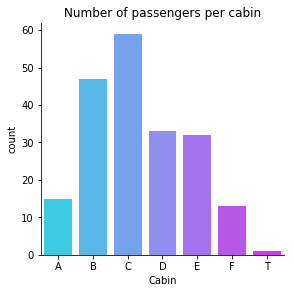

In [123]:
sns.factorplot("Cabin",data=cabin_dframe,kind="count",palette="cool",order=["A","B","C","D","E","F","T"])
plt.title("Number of passengers per cabin")

In above dataframe of cabin and class, a cabin T is superficial, so we can drop it without affecting our overall result.

In [124]:
cabin_dframe = cabin_dframe[cabin_dframe.Cabin != "T"]

Text(0.5,1,'Number of passengers per cabin')

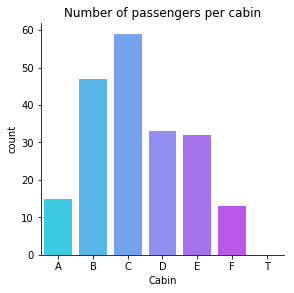

In [125]:
sns.factorplot("Cabin",data=cabin_dframe,kind="count",palette="cool",order=["A","B","C","D","E","F"])
plt.title("Number of passengers per cabin")

The above chart tells that maximum passenger were in middle deck "C" while least were in lowest deck "F"

Text(0.5,1,'Number of passengers per cabin in each class')

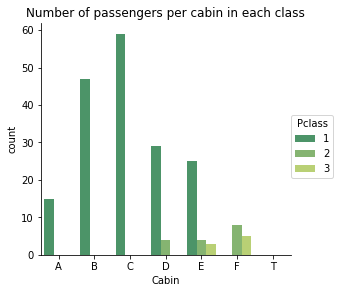

In [129]:
sns.factorplot("Cabin",data=cabin_dframe,kind="count",palette="summer",order=["A","B","C","D","E","F","T"],hue="Pclass")
plt.title("Number of passengers per cabin in each class")

When we plot cabin occupancy along with class, we find that the top three cabins (A,B,C) were occupied by passengers with 1st class tickets.

### Conclusions from Part 2 - 
1. Majority of passengers were in cabin B and C, then cabin D & E and finally least were in cabin A & F
2. Passengers in upper decks (A,B,C) were exclusively of 1st class

## Part - 3 Passengers point of embarkment

In [130]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


Note here that the Embarked column has C,Q,and S values. Reading about the project on Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.

Text(0.5,1,'Number of people boarding at different ports')

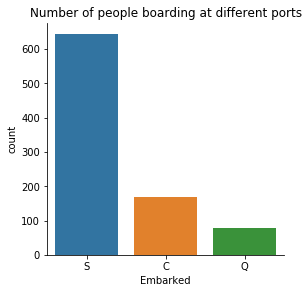

In [134]:
sns.factorplot("Embarked",data=titanic_data,kind="count")
plt.title("Number of people boarding at different ports")

So maximum people boarded the Titanic from Southhampton. Let us go more deep into data regarding embarkment

Text(0.5,1,'Number of people boarding at different ports in each class')

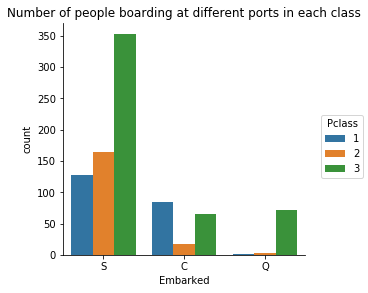

In [135]:
sns.factorplot("Embarked",data=titanic_data,kind="count",hue="Pclass")
plt.title("Number of people boarding at different ports in each class")

The above graph reveals that almost all passengers who boarded from Queenstown were in 3rd class. This indicates about financial state of queenstown during the time.

### Conclusions from Part 3 - 
1. Majority of passengers boarded from Southhampton, then from Cherbourg and the least from Queenstown
2. Almost none of the passesnger who boarded from Queenstown, took 1st or 2nd class

## Part - 4 Passengers travelling alone Vs travelling with family members

In [139]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In the dataframe, "SibSp" indicates number of accompanying siblings or spouse and "Parch"indicates that whether passenger had parents or children with them.

In [153]:
#Calculating all the passengers travelling alone
titanic_data["Accompany"] = titanic_data.Parch + titanic_data.SibSp

In [154]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Accompany
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


Now if Accompany value is 0 that means, the passenger was travelling alone

In [155]:
#Replacing 0 with alone and non-zero with Not Alone
titanic_data['Accompany'].loc[titanic_data['Accompany'] > 0] = 'Not Alone'
titanic_data['Accompany'].loc[titanic_data['Accompany'] == 0] = 'Alone'

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [156]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Accompany
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Not Alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Not Alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Not Alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Text(0.5,1,'Number of people travelling alone vs travelling not alone')

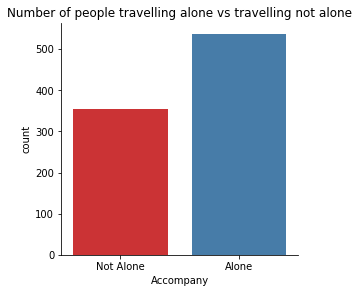

In [173]:
sns.factorplot("Accompany",data=titanic_data,kind="count",palette="Set1")
plt.title("Number of people travelling alone vs travelling not alone")

Above graph tells that people travelling Not-Alone were approximately two-third of the people travelling alone.

Text(0.5,1,'Number of people travelling alone vs travelling not alone')

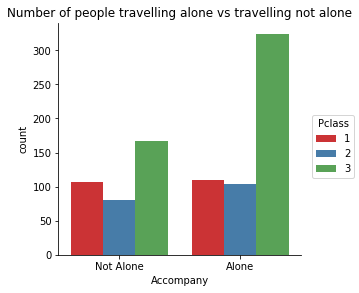

In [174]:
sns.factorplot("Accompany",data=titanic_data,kind="count",palette="Set1",hue="Pclass")
plt.title("Number of people travelling alone vs travelling not alone")

A vast majority of people travelling alone were in 3rd class. People travelling in 1st and 2nd class mostly had their families accompanying them.

Text(0.5,1,'Number of people travelling alone vs travelling not alone')

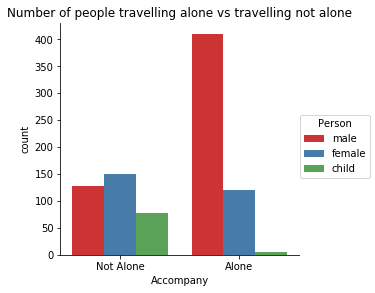

In [171]:
sns.factorplot("Accompany",data=titanic_data,kind="count",palette="Set1",hue="Person")
plt.title("Number of people travelling alone vs travelling not alone")

A vast majority of males were travelling alone while children travelling alone were almost none.
Infact most of the women and children were travelling with theirfamily.

### Conclusion from Part - 4
1. People travelling alone were more than people travelling with family.
2. The lone travellers were mostly males. Females and Children were mostly not alone.
3. Most of the people in 3rd class were travelling alone.

## Part-5 What factors helped someone survive the sinking?

Text(0.5,1,'Survivors Vs Non-Survivors')

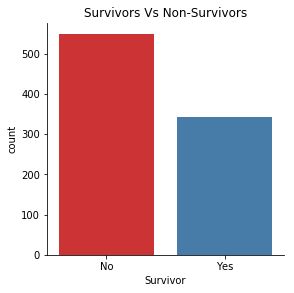

In [178]:
#Marking all survivors and non-survivors
titanic_data["Survivor"] = titanic_data.Survived.map({0:"No",1:"Yes"})
sns.factorplot("Survivor",data=titanic_data,kind="count",palette="Set1")
plt.title("Survivors Vs Non-Survivors")

Almost two-third of the people did not survive the unfortunate accident.

Text(0.5,1,'Survivors and Non-Survivors per class')

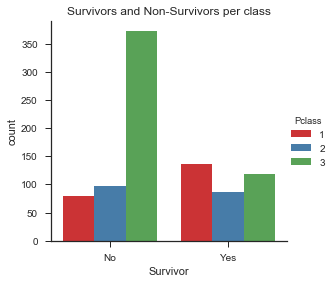

In [231]:
sns.factorplot("Survivor",data=titanic_data,hue="Pclass",kind="count",palette="Set1")
plt.title("Survivors and Non-Survivors per class")

Among survivors, majority were from 1st class while the unfortunate ones were from mostly 3rd class

Text(0.5,1,'Survival rate vs Class')

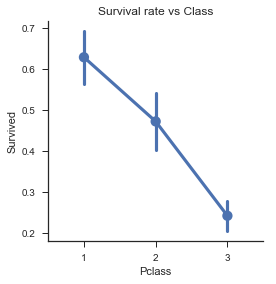

In [217]:
sns.factorplot("Pclass","Survived",data=titanic_data)
plt.title("Survival rate vs Class")

The survival rate reduced with class. Person in first class had higher survival chances compared to that of 3rd class. Not to forget major 3rd class passengers were Male. So lets find out whether policy of "women and children to be rescued first" had any impact.

Text(0.5,1,'Survival rate vs class for each type of person')

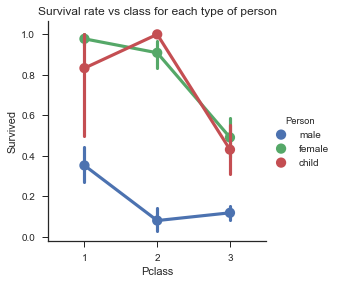

In [219]:
sns.factorplot("Pclass","Survived",data=titanic_data,hue="Person")
plt.title("Survival rate vs class for each type of person")

The above graph makes clear that regardless of class, survival rate was lower for Males compared to females and children, thus proving that priority was given to women and children during rescue.

Text(8.96,0.5,'1:Survived  0:Not-Survived')

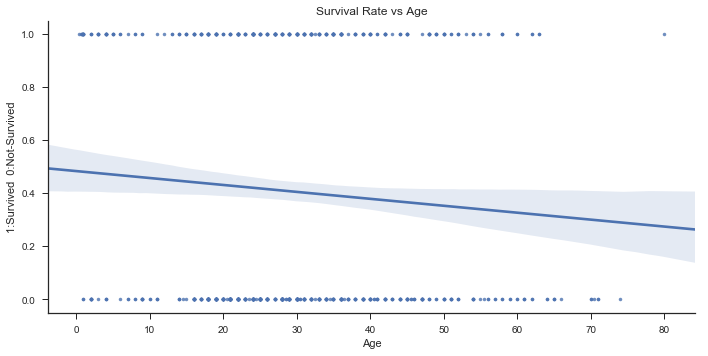

In [270]:
sns.lmplot("Age","Survived",data=titanic_data,markers=".",aspect=2)
plt.title("Survival Rate vs Age")
plt.ylabel("1:Survived  0:Not-Survived")

The above regression plot shows a general trend that survival rate decreased with increasing age.

Text(0.5,1,'Survival rate for each Class')

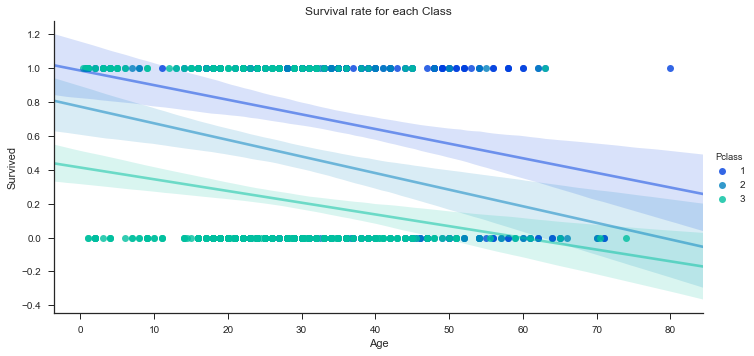

In [265]:
sns.lmplot("Age","Survived",data=titanic_data,markers="o",aspect=2,hue="Pclass",palette="winter",line_kws={"alpha":0.5})
plt.title("Survival rate for each Class")

Above graph indicates quite a lot information.
The general trend is that as age increases, survival rate decreases irrespective of class, though among survivors majority were from age more than 35. Infact a person with age 80 (maximum) survived. Among the elderly who survived, most of them were from 1st class

Text(0.5,1,'Survival rate for Males & Females')

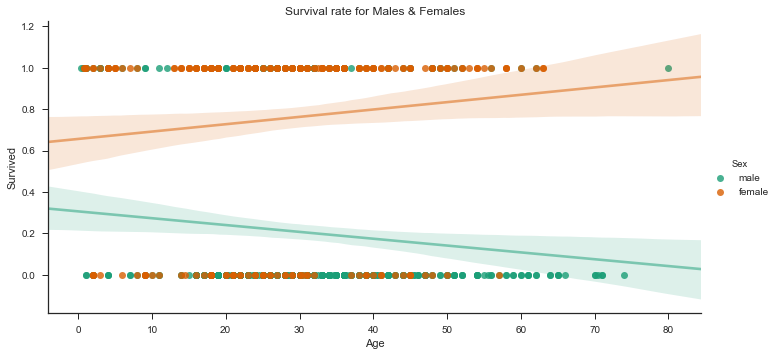

In [300]:
sns.lmplot("Age","Survived",data=titanic_data,markers="o",aspect=2,hue="Sex",line_kws={"alpha":0.5},palette="Dark2")
plt.title("Survival rate for Males & Females")

Survival rate for females increased with increasing age, contrary to males. This maye also be due to the fact that number of older females was less than older males.

Text(0.5,1,'Male Female survivors')

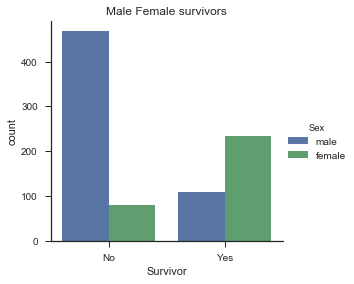

In [301]:
sns.factorplot("Survivor",data=titanic_data,hue="Sex",kind="count")
plt.title("Male Female survivors")

Above graph confirms that among survivors, number of women was almost double the number of males. Gender did play a major role in survival rate.

### Conclusions from Part-5
1. 1st Class people had higher survival rate compared to that of 3rd class.
2. Survival rate of males was lower than females and children, irrespective of class.
3. Survival rate for each class reduced with increase in passenger's age, but had a great standard deviation at the end.
4. Survival rate for women increased with increasing age contrary to opposite trend of males.

High survival rate - Women or children or travelling in 1st class.

Low survival rate - Male or elderly or travelling in 3rd class

## Part-6 Impact of deck on survival

A general intution is that higher the deck, better are chances of survival. Let us analyse

In [306]:
survived_cabin = titanic_data["Survivor"][titanic_data.Cabin.notnull()]

In [322]:
titanic_data[titanic_data.Cabin == "T"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Accompany,Survivor
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S,male,Alone,No


In [332]:
survived_cabin.drop(339,inplace=True)

In [334]:
cabin_dframe["Survived"] = survived_cabin.values

In [335]:
cabin_dframe.head()

,Cabin,Pclass,Survived
0,C,1,Yes
1,C,1,Yes
2,E,1,No
3,G,3,Yes
4,C,1,Yes


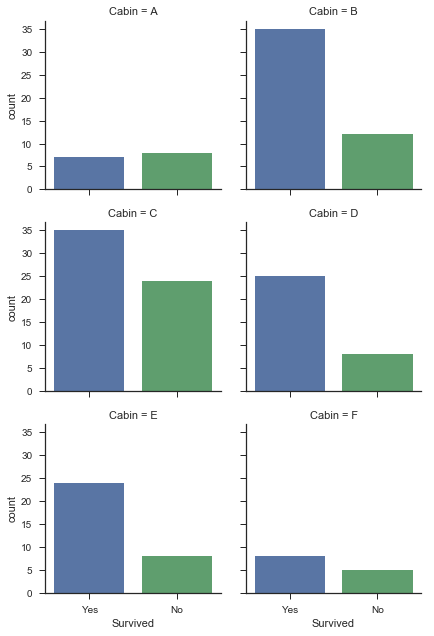

In [357]:
sns.factorplot("Survived",col="Cabin",data=cabin_dframe,kind="count",size=3,col_wrap=2,col_order=["A","B","C","D","E","F"])


As cabin data of all passengers is not avaliable but from what is available it can be concluded that survival was highest for deck B

### Conclusion from Part-6
1. Cabin had little or no impact on survival

## Part-7 Impact of accompanies

General intutuion tells that if a person was not alone then chances for his or her survival are more because the acoompany might look after their safety.

Text(0.5,1,'Survial rate vs accompany')

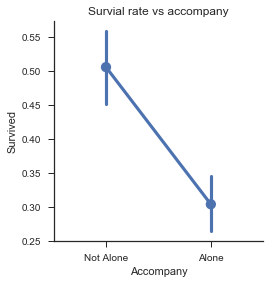

In [369]:
sns.factorplot("Accompany","Survived",data=titanic_data)
plt.title("Survial rate vs accompany")

Above graph proves that those travelling alone had less chances of survival. This is also in conjunction with the fact that most of the people travelling alone were male and we have already seen low survival rates for males.

Text(0.5,1,'Survival rate Vs Accompany for each type of person')

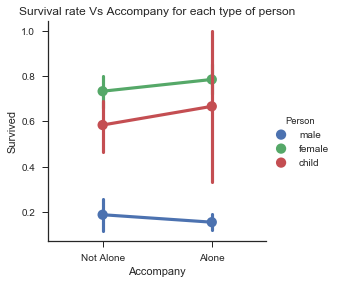

In [370]:
sns.factorplot("Accompany","Survived",data=titanic_data,hue="Person")
plt.title("Survival rate Vs Accompany for each type of person")

Above graph proves earlier deduced information. Since most of the females and children were travelling with accompanies so their survival rate was higher than males who were mostly alone.
Interestingly survival rate for female and children travelling alone is higher, owing to the fact that their number was quite small.
Dipping survival rate of males also suggests that preference was given to save family first

Text(0.5,1,'Survival rate Vs accompany for each class')

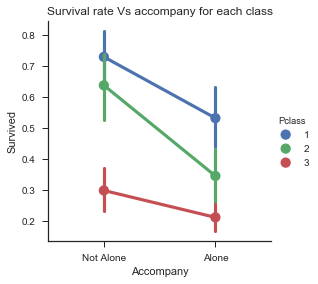

In [371]:
sns.factorplot("Accompany","Survived",data=titanic_data,hue="Pclass")
plt.title("Survival rate Vs accompany for each class")

Survival rate follows the general trend, i.e survival rate decreased from class 1 to class 3

### Conclusion from Part-7
1. Preference was given to resuce family over single passengers

# General Conclusion
1. Majority of passengers on-board Titanic were Males travelling in 3rd class
2. Majority of passengers were in 1st class
3. Majority of passengers were travelling alone.
4. Survival was higher for 1st class people compared to 3rd class.
5. Survival rate was lower for males compared to females and children irrespective of class
6. Survival rate decreased with increasing age of passenger.
7. Chances of survival were higher for people travelling with family.